In [12]:
import numpy as np
from numpy import *
from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from astropy.nddata.utils import Cutout2D
from astropy.utils.data import download_file
from astropy.wcs import wcs

In [13]:
#VISUALISING THE DATA

In [14]:
hdu = fits.open('G002.5+0.0.IFx_Mosaic.1pln.fits')[0]

In [19]:
#hdu.header['NAXIS'] = 2
#hdu.header['WCSAXES']=2
# delete all keywords of additional axis
#del hdu.header['NAXIS3']
#del hdu.header['NAXIS4']
#del hdu.header['CRPIX3']
wcs = wcs.WCS(hdu.header, naxis=2)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-SIN'  'GLAT-SIN'  
CRVAL : 2.5  0.0  
CRPIX : 3750.0  3750.0  
NAXIS : 7500  7500  1  1

In [21]:
hdu.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                 7500 / length of data axis 1                          
NAXIS2  =                 7500 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'GLON-SIN'           / Axis type                                      
CDELT1  =        -4.166667E-04 / Axis coordinate increment                      
CRPIX1  =         3.750000E+

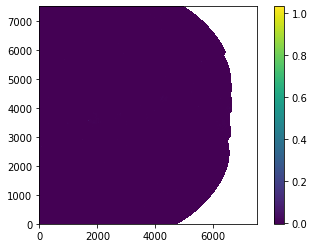

In [22]:
image_data = hdu.data.squeeze()
plt.imshow(image_data, origin='lower')
plt.colorbar()

In [23]:
image_data.shape

(7500, 7500)

In [24]:
#SPLITTING THE DATA

In [25]:
splity = np.array_split(image_data, 25, axis=1)

In [26]:
splitx = []
for i in splity:
    tempo = np.array_split(i,25)
    splitx.append(tempo)
splitx

[[array([[-4.60e-05,  1.00e-05, -8.00e-06, ..., -1.02e-04, -1.08e-04,
          -1.50e-04],
         [-9.00e-05, -5.80e-05, -8.80e-05, ..., -1.24e-04, -1.40e-04,
          -1.88e-04],
         [-1.48e-04, -1.38e-04, -1.76e-04, ..., -1.56e-04, -1.78e-04,
          -2.28e-04],
         ...,
         [-1.34e-04, -1.68e-04, -2.08e-04, ..., -3.78e-04, -3.84e-04,
          -3.80e-04],
         [-1.54e-04, -1.82e-04, -2.18e-04, ..., -3.32e-04, -3.46e-04,
          -3.54e-04],
         [-1.68e-04, -1.82e-04, -2.02e-04, ..., -2.80e-04, -3.00e-04,
          -3.18e-04]]),
  array([[-1.60e-04, -1.64e-04, -1.64e-04, ..., -2.46e-04, -2.66e-04,
          -2.90e-04],
         [-1.36e-04, -1.32e-04, -1.18e-04, ..., -2.42e-04, -2.60e-04,
          -2.80e-04],
         [-1.04e-04, -1.02e-04, -8.40e-05, ..., -2.66e-04, -2.76e-04,
          -2.88e-04],
         ...,
         [ 1.90e-04,  1.68e-04,  1.46e-04, ..., -6.00e-06, -2.40e-05,
          -4.20e-05],
         [ 2.02e-04,  1.74e-04,  1.50e-04, ...,  8

C:\Users\shari\anaconda3\lib\site-packages\matplotlib\image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\shari\anaconda3\lib\site-packages\matplotlib\image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\shari\anaconda3\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\shari\anaconda3\lib\site-packages\matplotlib\image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
C:\Users\shari\anaconda3\lib\site-packages\numpy\ma\core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


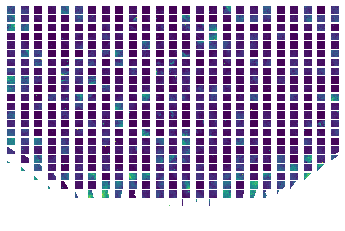

In [27]:
k = 0
for i in range(len(splitx)):
    for j in range (len(splitx)):
        plt.subplot(len(splitx),len(splitx),k+1)
        plt.imshow(splitx[i][j])
        plt.axis("off")
        k+=1
#plt.subplots_adjust(wspace=1, hspace=1)

In [28]:
#NORMALISING AND REMOVING NANs FROM DATA

In [29]:
split_norm = np.ndarray((len(splitx),len(splitx)), dtype=ndarray)
n = 0
while n < len(splitx):
    m = 0
    while m < len(splitx):
        row_sum = sum(splitx[n][m])
        split_norm[n][m] = splitx[n][m] / row_sum
        split_norm[n][m] = np.where(np.isnan(split_norm[n][m]), 0, split_norm[n][m])
        m+=1
    n+=1
split_norm

array([[array([[ 1.60982762e-06, -3.49962526e-07,  2.79970021e-07, ...,
         3.56961777e-06,  3.77959528e-06,  5.24943789e-06],
       [ 3.14966273e-06,  2.02978265e-06,  3.07967023e-06, ...,
         4.33953532e-06,  4.89947536e-06,  6.57929549e-06],
       [ 5.17944538e-06,  4.82948286e-06,  6.15934046e-06, ...,
         5.45941541e-06,  6.22933296e-06,  7.97914559e-06],
       ...,
       [ 4.68949785e-06,  5.87937044e-06,  7.27922054e-06, ...,
         1.32285835e-05,  1.34385610e-05,  1.32985760e-05],
       [ 5.38942290e-06,  6.36931797e-06,  7.62918307e-06, ...,
         1.16187559e-05,  1.21087034e-05,  1.23886734e-05],
       [ 5.87937044e-06,  6.36931797e-06,  7.06924303e-06, ...,
         9.79895073e-06,  1.04988758e-05,  1.11288083e-05]]),
        array([[ 4.50978624e-04,  4.62253089e-04,  4.62253089e-04, ...,
         6.93379634e-04,  7.49751962e-04,  8.17398755e-04],
       [ 3.83331830e-04,  3.72057364e-04,  3.32596735e-04, ...,
         6.82105168e-04,  7.32840263e-

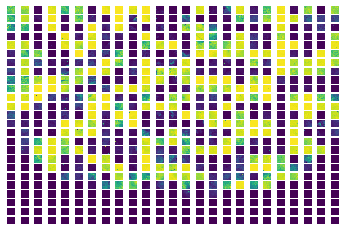

In [30]:
k = 0
for i in range(len(splitx)):
    for j in range (len(splitx)):
        plt.subplot(len(splitx),len(splitx),k+1)
        plt.imshow(split_norm[i][j])
        plt.axis("off")
        k+=1
#plt.subplots_adjust(wspace=1, hspace=1)

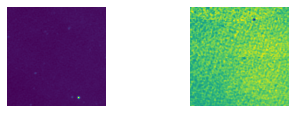

In [59]:
f = [splitx[1][4], split_norm[0][0]]
k = 0
for i in range(2):
    plt.subplot(2,2,k+1)
    plt.imshow(f[i])
    plt.axis("off")
    k+=1
#plt.subplots_adjust(wspace=1, hspace=1)

In [32]:
split_norm[7][11].shape

(300, 300)

In [33]:
#hdu = fits.PrimaryHDU(split_norm[7][11])
#hdulist = fits.HDUList([hdu])
#hdulist.writeto("filaments1.fits")
#hdulist.close()

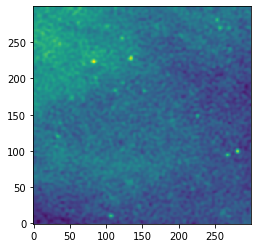

In [34]:
n = 11
m = 8
cutout1 = Cutout2D(image_data, (150+n*300, 150+m*300), (300, 300))
#cutout = cutout1.data / sum(cutout1.data)

plt.imshow(cutout1.data, origin='lower')

In [35]:
cutout_norm = np.ndarray((len(splitx),len(splitx)), dtype=ndarray)
n = 0
while n < len(splitx):
    m = 0
    while m < len(splitx):
        cutout_norm[n][m] = Cutout2D(image_data, (150+n*300, 150+m*300), (300, 300)).data
        cutout_norm[n][m] = cutout_norm[n][m] / sum(cutout_norm[n][m])
        cutout_norm[n][m] = np.where(np.isnan(cutout_norm[n][m]), 0, cutout_norm[n][m])
        m+=1
    n+=1
len(cutout_norm.flatten())

625

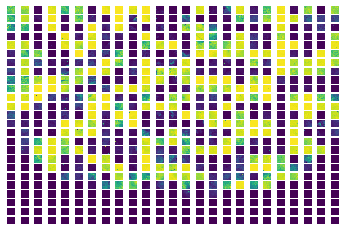

In [36]:
k = 0
for i in range(len(splitx)):
    for j in range (len(splitx)):
        plt.subplot(len(splitx),len(splitx),k+1)
        plt.imshow(cutout_norm[i][j])
        plt.axis("off")
        k+=1

In [37]:
image_data = np.where(np.isnan(image_data), 0, image_data)

In [38]:
def download_image_save_cutout(n, m, f):

    
# Make the cutout, including the WCS
    cutout = Cutout2D(image_data, position=(150+n*300, 150+m*300), size=(300, 300), wcs = wcs)

    # Put the cutout image in the FITS HDU
    hdu.data = cutout.data

    # Update the FITS header with the cutout WCS
    hdu.header.update(cutout.wcs.to_header())
    
    # Write the cutout to a new FITS file
    cutout_filename = r'C:\Users\shari\Documents\YR 4 Project\My work\Images\cut{}.fits'.format(f)
    hdu.writeto(cutout_filename, overwrite=True)


n = 0
while n < len(splitx):
    m = 0
    while m < len(splitx):
        download_image_save_cutout(n, m, (n+1)*(m+1))
        m+=1
    n+=1

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\shari\\Documents\\YR 4 Project\\My work\\Images\\cut49.fits'

In [ ]:
#k = 0
#for i in range(len(splitx)):
#    for j in range (len(splitx)):
#        hdu = fits.open(r'C:\Users\shari\Documents\YR 4 Project\My work\Images\cut{}.fits'.format((i+1)*(j+1)))[0]
#        plt.subplot(len(splitx),len(splitx),k+1)
#        plt.imshow(hdu.data)
#        plt.axis("off")
#        k+=1
#plt.subplots_adjust(wspace=1, hspace=1)

In [ ]:
image_data